# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from see import Segmentors
from see import JupyterGUI

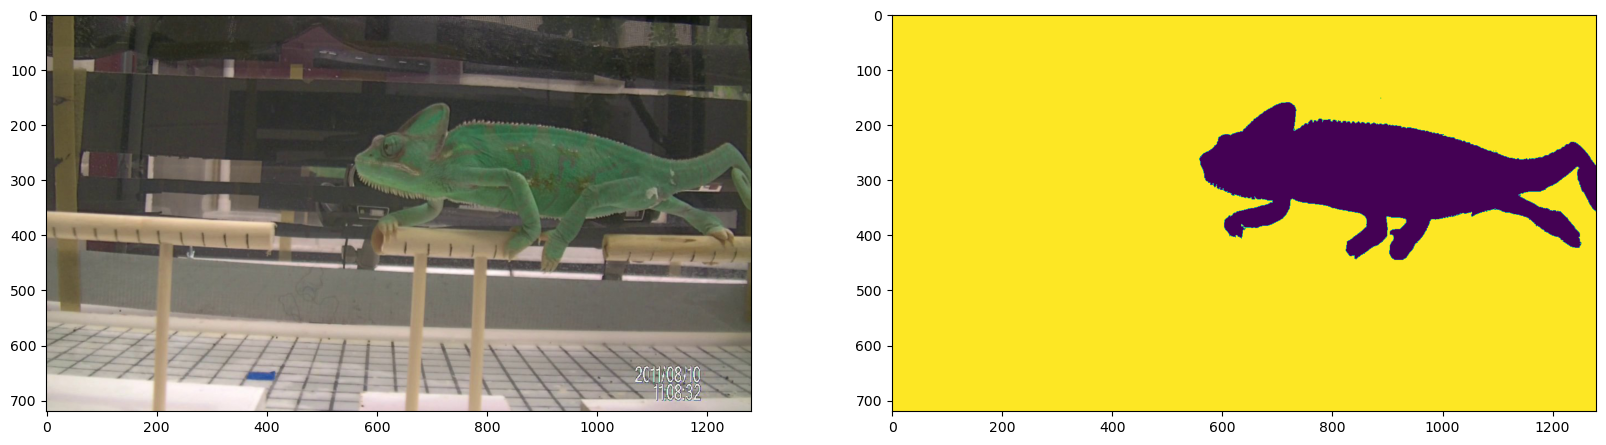

In [2]:
from imageio import v3 as imageio

img = imageio.imread('./Image_data/Examples/Headphones.jpeg')
gmask = imageio.imread('./Image_data/Examples/Headphones_GT.png')

img = imageio.imread('Image_data/Examples/AA_Chameleon.jpg')
gmask = imageio.imread('Image_data/Examples/AA_Chameleon_GT.png')

fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(img)
my_ax = fig.add_subplot(1, 2, 2)
my_ax.imshow(gmask)

In [3]:
from see import base_classes

# put data in a pipeline
mydata = base_classes.pipedata()
mydata.append([img])
mydata.gtruth.append(gmask)

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [4]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch

#define an algorithm workflow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [5]:
#TODO This needs to be fixed Using the new syntax.
#my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=3)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [6]:
x = Segmentors.SlicO()

In [7]:
# warnings may appear when this runs
population = my_evolver.run(ngen=1)

Initializing a new random population
Generation 0/1 of population size 3
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = True
	channel = 1
	algorithm = Slic
	alpha1 = 0.74609375
	alpha2 = 0.875
	beta1 = 0.59375
	beta2 = 0.89453125
	gamma1 = 0.7578125
	gamma2 = 0.43359375
	n_segments = 0
	max_num_iter = 3

Time: 1.67 s
p_fitness=1.5

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YCbCr
	multichannel = False
	channel = 2
	algorithm = ColorThreshold
	alpha1 = 0.9140625
	alpha2 = 0.15625
	beta1 = 0.30859375
	beta2 = 0.01953125
	gamma1 = 0.5859375
	gamma2 = 0.4765625
	n_segments = 5
	max_num_iter = 4

Time: 1.404 s
p_fitness=1.5

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 0
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.421875
	alpha2 = 0.7421875
	beta1 = 0.37109375
	beta2 = 0.66015625
	gamma1 = 0.3046875
	gamma2 = 0.42578125
	n_segments = 6
	max_num_iter = 19

Time: 5.315 s
p_fitness=1.5

#B

In [8]:
print(my_evolver.hof[2].fitness)

(1.5,)


----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [9]:
params = my_evolver.hof[0]
fitness = params.fitness.values[0]
print(f'Best Individual ({fitness}):\n', params)

Best Individual (1.5):
 ['YDbDr', False, 0, 'Morphological_Chan_Vese', 0.421875, 0.7421875, 0.37109375, 0.66015625, 0.3046875, 0.42578125, 6, 19]


We can see the mask this individual generates by evaluating it, then plotting the result:

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 0
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.421875
	alpha2 = 0.7421875
	beta1 = 0.37109375
	beta2 = 0.66015625
	gamma1 = 0.3046875
	gamma2 = 0.42578125
	n_segments = 6
	max_num_iter = 19

Time: 5.31 s


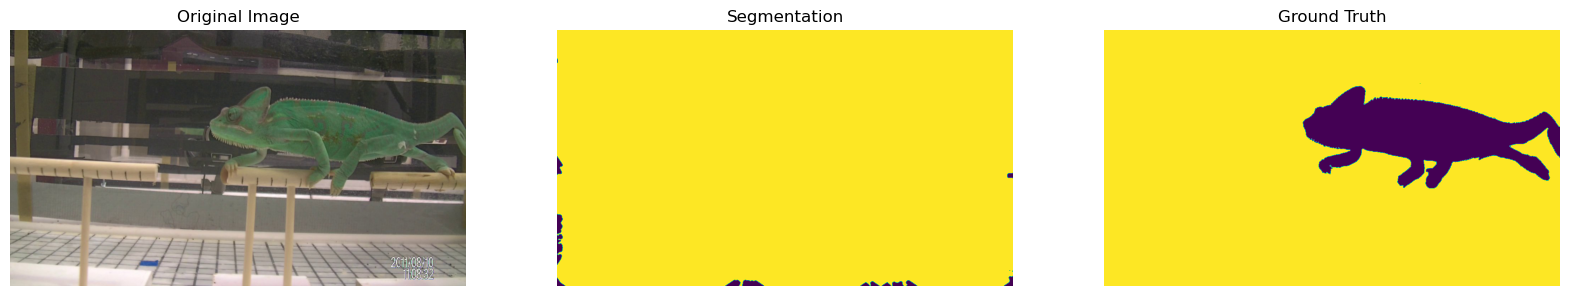

In [10]:
seg = workflow(params)
data = seg.runAlgo(mydata)

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(data[0][0])
plt.title("Original Image")
plt.axis('off')

plt.subplot(132)
plt.imshow(data[0][-1])
plt.title("Segmentation")
plt.axis('off')

plt.subplot(133)
plt.imshow(data.gtruth[0])
plt.title("Ground Truth")
plt.axis('off')


plt.tight_layout
plt.show()

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [11]:
print('Fitness Value: ', data.fitness)

Fitness Value:  1.5
